# Exploratory Data Analysis (EDA)
The objective of this notebook is to perform an exploratory data analysis over the dataset provided by the institutions leading the Telangana Classification Challenge in order to better understand its characteristics.  

## Libraries
The first step is to import the required Python libraries.

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

ModuleNotFoundError: No module named 'seaborn'

## Data Loading

In [2]:
df=pd.read_csv("../data/Train.csv")

# Data Overview

In [3]:
#Dataset size
print("The dataset has",df.shape[0],"rows and",df.shape[1],"attributes")
#Target feature
print("The target feature is stored in the column \"category\" and it has the next values:",df.category.unique())

The dataset has 8775 rows and 20 attributes
The target feature is stored in the column "category" and it has the next values: ['Healthy' 'Diseased' 'Pests' 'Stressed']


In [4]:
# Taking a look
df.head()

,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,geometry
0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,25-11-2023,14-04-2024,97,54,Pea,Lentil,Transplanting,Flood,Groundwater,4,87,17,Rabi,POLYGON ((78.18143246076087 17.978884603571068...
1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,13-11-2023,26-04-2024,82,58,Pea,Lentil,Transplanting,Flood,Canal,5,94,15,Rabi,POLYGON ((78.17545177547453 17.981074445477304...
2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,19-12-2023,28-04-2024,92,91,Pea,Lentil,Transplanting,Flood,Canal,3,99,20,Rabi,POLYGON ((78.16914224770792 17.976212849967755...
3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,11-02-2023,04-11-2024,91,52,Pea,Lentil,Transplanting,Flood,Canal,5,92,16,Rabi,POLYGON ((78.16889103841902 17.974608186550842...
4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,12-12-2023,19-05-2024,94,55,Pea,Lentil,Transplanting,Flood,Canal,5,97,20,Rabi,POLYGON ((78.17264452998072 17.969251496349454...


In [5]:
# General information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8775 entries, 0 to 8774
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FarmID           8775 non-null   int64 
 1   category         8775 non-null   object
 2   Crop             8775 non-null   object
 3   State            8775 non-null   object
 4   District         8775 non-null   object
 5   Sub-District     8775 non-null   object
 6   SDate            8775 non-null   object
 7   HDate            8775 non-null   object
 8   CropCoveredArea  8775 non-null   int64 
 9   CHeight          8775 non-null   int64 
 10  CNext            8775 non-null   object
 11  CLast            8775 non-null   object
 12  CTransp          8775 non-null   object
 13  IrriType         8775 non-null   object
 14  IrriSource       8775 non-null   object
 15  IrriCount        8775 non-null   int64 
 16  WaterCov         8775 non-null   int64 
 17  ExpYield         8775 non-null   

**Observations**
From this quick overview it is possible to observe that:
1. There are not missing values in the provided dataset. 
2. There are 19 attributes. Some of them such as the Farm ID may not be related to the studied phenomenon, which motivates a deeper analysis of each variable.
3. The target feature has 4 possible values to predict which means a multiclass classification algorithm should be developed.

# Univariate Analysis

category
Healthy     7214
Diseased     537
Pests        536
Stressed     488
Name: count, dtype: int64


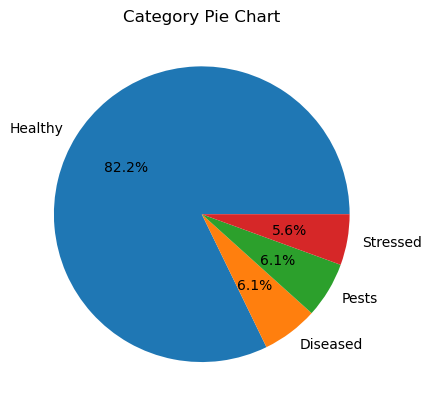

In [9]:
# Target Variable (Category)
print(df.category.value_counts())
fig1=plt.figure()
ax1=fig1.add_subplot()
ax1.pie(df.category.value_counts().values,labels=list(df.category.value_counts().index),autopct='%1.1f%%');
ax1.set_title("Category Pie Chart");

Crop
Paddy          2434
Cotton         1819
Maize          1506
Chillies       1063
Bengal Gram     938
Groundnut       768
Red Gram        247
Name: count, dtype: int64


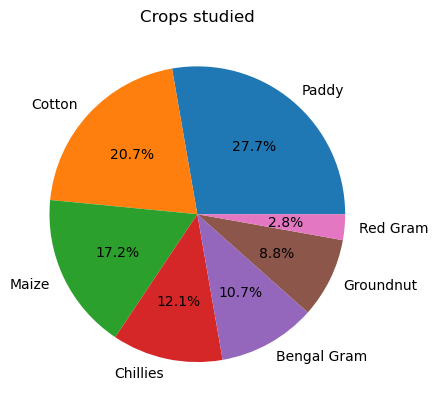

In [ ]:
# Crops
print(df.Crop.value_counts())
fig2=plt.figure()
ax2=fig2.add_subplot()
ax2.pie(df.Crop.value_counts().values,labels=list(df.Crop.value_counts().index),autopct='%1.1f%%');
ax2.set_title("Crops studied");


Crops by State
Telangana    8775
Name: count, dtype: int64 

Crops by District
Mahabubabad     1943
Adilabad        1909
Nalgonda        1408
Medak           1285
Nirmal          1254
Mahabubnagar     655
Narayanpet       203
Nagarkurnool      47
Warangal          30
Siddipet          14
Vikarabad         11
Kamareddy          7
Wanaparthy         6
Khammam            3
Name: count, dtype: int64 

Crops by Sub-District
Utnur            506
Inderavelly      345
Gudur            338
Havelighanpur    305
Ramayampet       293
                ... 
Devarkadra         3
Singareni          2
Narsapur           2
Pembi              1
Khammam_Rural      1
Name: count, Length: 116, dtype: int64 



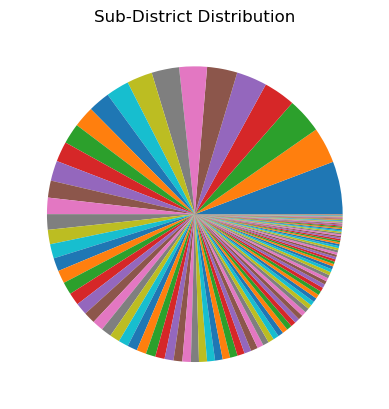

In [34]:
# Political distribution of Crops
print('Crops by',df.State.value_counts(),'\n')
print('Crops by',df.District.value_counts(),'\n')
print('Crops by',df["Sub-District"].value_counts(),'\n')
fig3=plt.figure()
ax3=fig3.add_subplot()
ax3.pie(df["Sub-District"].value_counts().values);
ax3.set_title("Sub-District Distribution");

SDate
2023    8341
2024     434
Name: count, dtype: int64 

SDate
01     328
02     326
03     294
04     345
05     574
06     974
07     719
08     330
09     308
10    1263
11    1985
12    1329
Name: count, dtype: int64


Text(0.5, 1.0, 'Sowing Months')

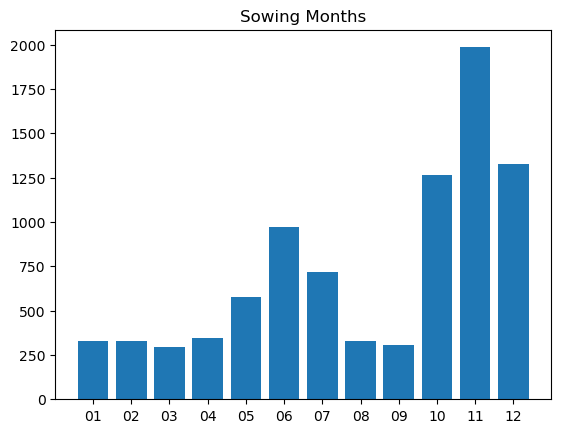

In [92]:
#Dates data
#Sowing year
syear=df.SDate.map(lambda x:x[-4:])
print(syear.value_counts(),'\n')
#Sowing month
smonth=df.SDate.map(lambda x:x[-7:-5])
print(smonth.value_counts().sort_index())
fig4=plt.figure()
ax4=fig4.add_subplot()
ax4.bar(smonth.value_counts().sort_index().index,smonth.value_counts().sort_index().values)
ax4.set_title("Sowing Months")

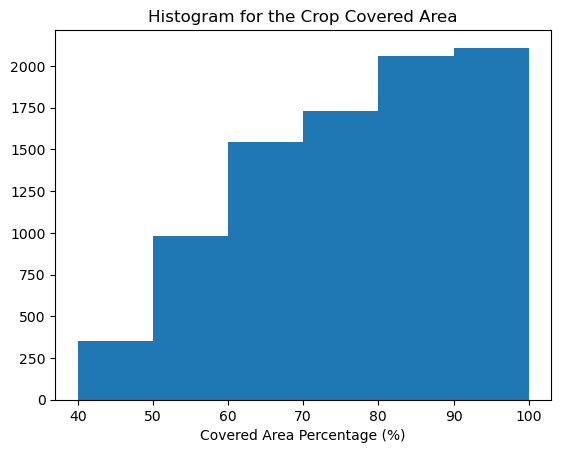

In [107]:
# Crop Covered Area
df.CropCoveredArea.describe()
fig5=plt.figure()
ax5=fig5.add_subplot()
ax5.hist(df.CropCoveredArea.values,bins=6);
ax5.set_title("Histogram for the Crop Covered Area");
ax5.set_xlabel("Covered Area Percentage (%)");
# Outliers identification missing

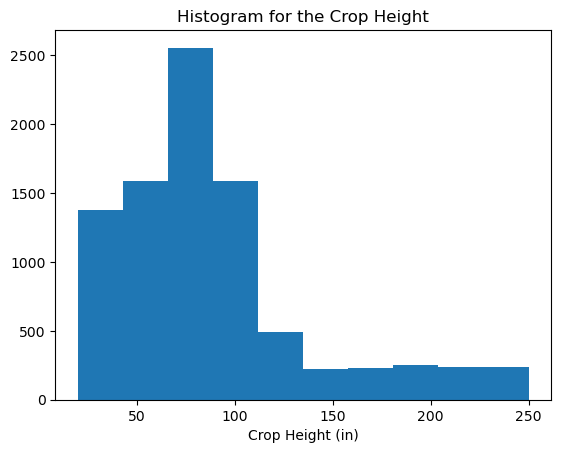

In [ ]:
# Crop Height
print(df.CHeight.describe())
fig6=plt.figure()
ax6=fig6.add_subplot()
ax6.hist(df.CHeight.values);
ax6.set_title("Histogram for the Crop Height");
ax6.set_xlabel("Crop Height (in)");
# Outliers identification missing

CLast
Lentil     1430
Maize      1312
Wheat      1298
Sorghum    1038
Pea        1004
Soybean     774
Tomato      551
Onion       512
Mustard     493
Rice        363
Name: count, dtype: int64


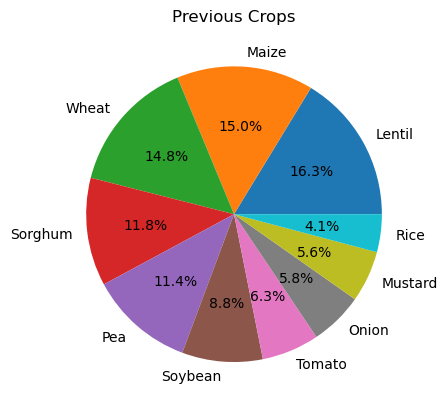

In [116]:
# Crop cultivated in the previous season
print(df.CLast.value_counts())
fig7=plt.figure()
ax7=fig7.add_subplot()
ax7.pie(df.CLast.value_counts().values,labels=list(df.CLast.value_counts().index),autopct='%1.1f%%');
ax7.set_title("Previous Crops");

CTransp
Transplanting    2434
Drilling         2144
Broadcasting     2110
Seed Drilling    2087
Name: count, dtype: int64


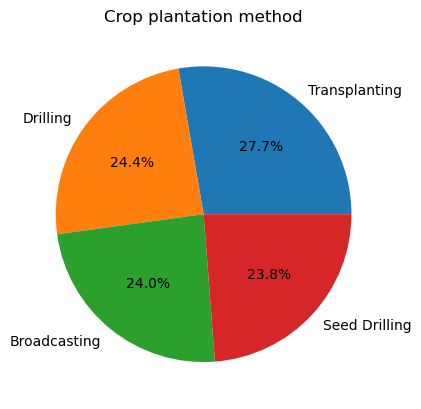

In [115]:
# How was the crop planted?
print(df.CTransp.value_counts())
fig8=plt.figure()
ax8=fig8.add_subplot()
ax8.pie(df.CTransp.value_counts().values,labels=list(df.CTransp.value_counts().index),autopct='%1.1f%%');
ax8.set_title("Crop plantation method");

IrriType
Drip         3215
Sprinkler    2644
Flood        2434
Surface       482
Name: count, dtype: int64


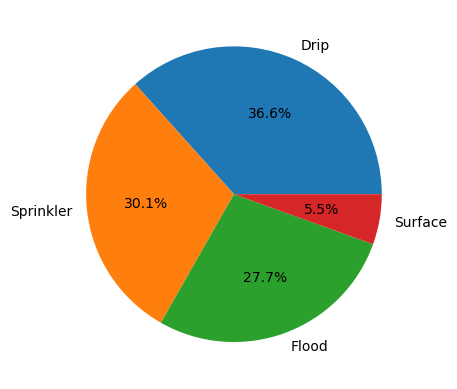

In [117]:
# Irrigation Type
print(df.IrriType.value_counts())
fig9=plt.figure()
ax9=fig9.add_subplot()
ax9.pie(df.IrriType.value_counts().values,labels=list(df.IrriType.value_counts().index),autopct='%1.1f%%');
ax8.set_title("Irrigation Type");

IrriSource
Groundwater    3668
Canal          3506
Rainfed        1448
Tubewell         77
Well             76
Name: count, dtype: int64


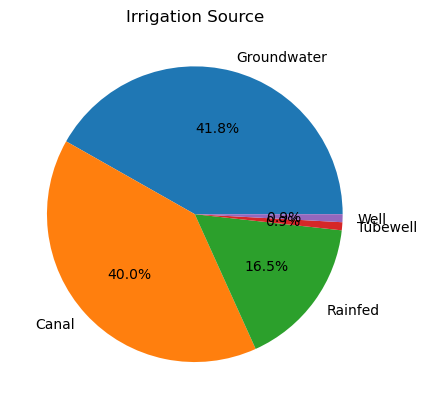

In [120]:
# Irrigation Source
print(df.IrriSource.value_counts())
fig10=plt.figure()
ax10=fig10.add_subplot()
ax10.pie(df.IrriSource.value_counts().values,labels=list(df.IrriSource.value_counts().index),autopct='%1.1f%%');
ax10.set_title("Irrigation Source");

count    8775.000000
mean        3.550541
std         1.391602
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: IrriCount, dtype: float64 

IrriCount
4    2129
3    2078
2    1640
5    1507
6     834
1     587
Name: count, dtype: int64


Text(0.5, 1.0, 'Irrigation Times Histogram')

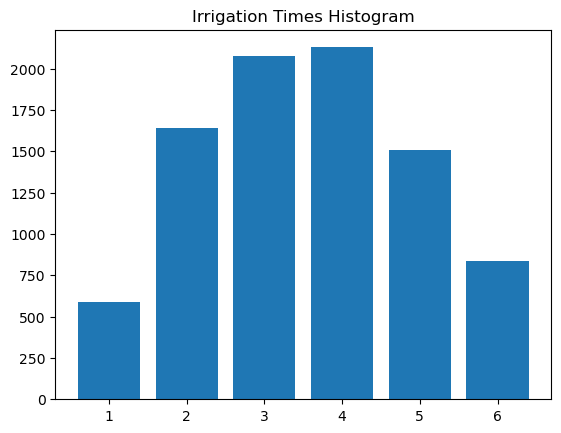

In [131]:
# Times the farm was irrigated
print(df.IrriCount.describe(),'\n')
print(df.IrriCount.value_counts())
fig11=plt.figure()
ax11=fig11.add_subplot()
ax11.bar(df.IrriCount.value_counts().index,df.IrriCount.value_counts().values);
ax11.set_title("Irrigation Times Histogram")


In [20]:
df.columns

Index(['FarmID', 'category', 'Crop', 'State', 'District', 'Sub-District',
       'SDate', 'HDate', 'CropCoveredArea', 'CHeight', 'CNext', 'CLast',
       'CTransp', 'IrriType', 'IrriSource', 'IrriCount', 'WaterCov',
       'ExpYield', 'Season', 'geometry'],
      dtype='object')

count    8775.000000
mean       57.150199
std        22.330291
min        20.000000
25%        42.000000
50%        51.000000
75%        82.000000
max       100.000000
Name: WaterCov, dtype: float64


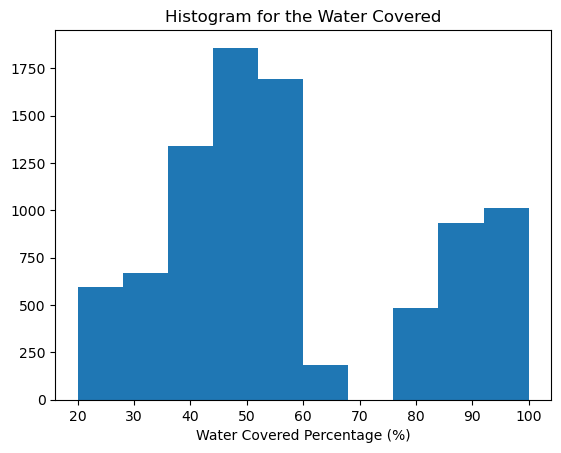

In [134]:
# Estimated percentage of the area covered with water due to irrigation
print(df.WaterCov.describe())
fig12=plt.figure()
ax12=fig12.add_subplot()
ax12.hist(df.WaterCov.values);
ax12.set_title("Histogram for the Water Covered");
ax12.set_xlabel("Water Covered Percentage (%)");
# Outliers identification missing


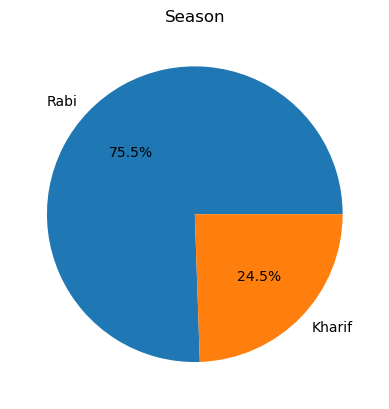

In [137]:
#Season
df.Season.value_counts()
fig13=plt.figure()
ax13=fig13.add_subplot()
ax13.pie(df.Season.value_counts().values,labels=list(df.Season.value_counts().index),autopct='%1.1f%%');
ax13.set_title("Season");
#Rabi crops are swon during winter while Kharif ones during June

## Observations:
From the Univariate Analysis it is possible to observe:
1. There is a high imbalance between the *Healthy* class and the other three. This is important to take into consideration when selecting the appropiate metric. Is there a need to balance classes?
2. The *State* variable should be retired as it has the same value for every sample.
3. The *Sub-District* feature shows to itself to be a high-cardinality variable.
4. From the data available inside the varibale *SDate* the most importance piece is the sowing month according to the the project's temporal. The sowing month day seems to be too specific and the sowing year is not useful as the algorithm will be deployed years later the collection of this data. 
5. The harvest data (*HDate* variable) won't be available to be collected during the deployment of the algorithm since the objective of this is to predict conditions on on-going crops (not yet harvested). Then, this variable shouldn't be used for training.
The same applies for the *CNext* and *ExpYield* variables.
6. The Crop Covered Area has a right-skewed distribution, with most of its values ranging between 70 and 100%. This variable could be useful when related to data coming from satellites such as the NDVI.
7. According to the data dictionary provided by the challenge sponsors the *CHeight* variable has *feet* units, but it doesn't make physical sense to have paddy or cotton crops of 100 feet height. The actual units are probably inches.
8. The *CHeight* variable has a slightly skewed to the left normal distribution with a long tail to the right, indicating the presence of some outliers.
9. The *Irrigation Count* variable has a wide normal distribution due to a large standard deviation.
10. The *WaterCov* variable has a bimodal distribution which could be generated by the use of different irrigation methods.
11. Three quarters of the crops were sown during winter.
12. The *polygon* column is not useful for the training but for matching data coming from satellite images

# Questions
1. How to evaluate the independence of the dataset points? Ejemplo: Tengo 7200 puntos de Healthy, cómo saber que tan linealmente independiente son?
2. Qué hacer si estoy seguro que no hay una relación física con el fenómeno, más no estoy seguro de que así sea con matemáticamente?
3. Is there a need to balance classes?
4. Cómo cambia todo cuando me encuentro con una variable que no sigue una distribución normal?